# POMDPs for Preventative Maintenance
---
In this notebook we look at POMDPs to solve the preventative maintenance problem for systems. This code used relies on [`mdp.py`](https://github.com/aimacode/aima-python/blob/master/mdp.py), for **Chapter 17 Making Complex Decisions** of Stuart Russel's and Peter Norvig's book [*Artificial Intelligence: A Modern Approach*](http://aima.cs.berkeley.edu/).


In [4]:
from mdp import *

## CONTENTS
- POMDP
    - Two state POMDP
    - Preventative Maintenance POMDP

## POMDP
### Two state POMDP
Let's consider a problem where we have two doors, one to our left and one to our right.
One of these doors opens to a room with a tiger in it, and the other one opens to an empty hall.
<br>
We will call our two states `0` and `1` for `left` and `right` respectively.
<br>
The possible actions we can take are as follows:
<br>
1. __Open-left__: Open the left door.
Represented by `0`.
2. __Open-right__: Open the right door.
Represented by `1`.
3. __Listen__: Listen carefully to one side and possibly hear the tiger breathing.
Represented by `2`.

<br>
The possible observations we can get are as follows:
<br>
1. __TL__: Tiger seems to be at the left door.
2. __TR__: Tiger seems to be at the right door.

<br>
The reward function is as follows:
<br>
We get +10 reward for opening the door to the empty hall and we get -100 reward for opening the other door and setting the tiger free.
<br>
Listening costs us -1 reward.
<br>
We want to minimize our chances of setting the tiger free.


Our transition probabilities can be defined as:
<br>
<br>
Action `0` (Open left door)
$\\
    P(0) = 
    \left[ {\begin{array}{cc}
    0.5 & 0.5 \\
    0.5 & 0.5 \\
    \end{array}}\right] \\
    \\
    $
    
Action `1` (Open right door)
$\\
    P(1) = 
    \left[ {\begin{array}{cc}
    0.5 & 0.5 \\
    0.5 & 0.5 \\
    \end{array}}\right] \\
    \\
    $
    
Action `2` (Listen)
$\\
    P(2) = 
    \left[ {\begin{array}{cc}
    1.0 & 0.0 \\
    0.0 & 1.0 \\
    \end{array}}\right] \\
    \\
    $
    
<br>
<br>
Our observation probabilities can be defined as:
<br>
<br>
$\\
    O(0) = 
    \left[ {\begin{array}{ccc}
    Open left & TL & TR \\
    Tiger: left & 0.5 & 0.5 \\
    Tiger: right & 0.5 & 0.5 \\
    \end{array}}\right] \\
    \\
    $

$\\
    O(1) = 
    \left[ {\begin{array}{ccc}
    Open right & TL & TR \\
    Tiger: left & 0.5 & 0.5 \\
    Tiger: right & 0.5 & 0.5 \\
    \end{array}}\right] \\
    \\
    $

$\\
    O(2) = 
    \left[ {\begin{array}{ccc}
    Listen & TL & TR \\
    Tiger: left & 0.85 & 0.15 \\
    Tiger: right & 0.15 & 0.85 \\
    \end{array}}\right] \\
    \\
    $

<br>
<br>
The rewards of this POMDP are defined as:
<br>
<br>
$\\
    R(0) = 
    \left[ {\begin{array}{cc}
    Openleft & Reward \\
    Tiger: left & -100 \\
    Tiger: right & +10 \\
    \end{array}}\right] \\
    \\
    $
    
$\\
    R(1) = 
    \left[ {\begin{array}{cc}
    Openright & Reward \\
    Tiger: left & +10 \\
    Tiger: right & -100 \\
    \end{array}}\right] \\
    \\
    $
    
$\\
    R(2) = 
    \left[ {\begin{array}{cc}
    Listen & Reward \\
    Tiger: left & -1 \\
    Tiger: right & -1 \\
    \end{array}}\right] \\
    \\
    $
    
<br>
Based on these matrices, we will initialize our variables.

Let's first define our transition state.

In [5]:
t_prob = [[[0.5, 0.5], 
           [0.5, 0.5]], 
          
          [[0.5, 0.5], 
           [0.5, 0.5]], 
          
          [[1.0, 0.0], 
           [0.0, 1.0]]]

Followed by the observation model.

In [6]:
e_prob = [[[0.5, 0.5], 
           [0.5, 0.5]], 
          
          [[0.5, 0.5], 
           [0.5, 0.5]], 
          
          [[0.85, 0.15], 
           [0.15, 0.85]]]

And the reward model.

In [7]:
rewards = [[-100, 10], 
           [10, -100], 
           [-1, -1]]

Let's now define our states, observations and actions.
<br>
We will use `gamma` = 0.95 for this example.
<br>

In [8]:
# 0: open-left, 1: open-right, 2: listen
actions = ('0', '1', '2')
# 0: left, 1: right
states = ('0', '1')

gamma = 0.95

We have all the required variables to instantiate an object of the `POMDP` class.

In [9]:
pomdp = POMDP(actions, t_prob, e_prob, rewards, states, gamma)

We can now find the utility function by running `pomdp_value_iteration` on our `pomdp` object.

In [10]:
utility = pomdp_value_iteration(pomdp, epsilon=3)
utility

defaultdict(list,
            {'1': [array([ 26.94830804, -83.05169196])],
             '2': [array([23.55049363, -0.76359097]),
              array([23.55049363, -0.76359097]),
              array([23.55049363, -0.76359097]),
              array([23.55049363, -0.76359097]),
              array([23.24120177,  1.56028929]),
              array([23.24120177,  1.56028929]),
              array([23.24120177,  1.56028929]),
              array([20.0874279 , 15.03900771]),
              array([20.0874279 , 15.03900771]),
              array([20.0874279 , 15.03900771]),
              array([20.0874279 , 15.03900771]),
              array([17.91696135, 17.91696135]),
              array([17.91696135, 17.91696135]),
              array([17.91696135, 17.91696135]),
              array([17.91696135, 17.91696135]),
              array([17.91696135, 17.91696135]),
              array([15.03900771, 20.0874279 ]),
              array([15.03900771, 20.0874279 ]),
              array([15.03900771, 20.0

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_utility(utility):
    open_left = utility['0'][0]
    open_right = utility['1'][0]
    listen_left = utility['2'][0]
    listen_right = utility['2'][-1]
    left = (open_left[0] - listen_left[0]) / (open_left[0] - listen_left[0] + listen_left[1] - open_left[1])
    right = (open_right[0] - listen_right[0]) / (open_right[0] - listen_right[0] + listen_right[1] - open_right[1])
    
    colors = ['g', 'b', 'k']
    for action in utility:
        for value in utility[action]:
            plt.plot(value, color=colors[int(action)])
    plt.vlines([left, right], -10, 35, linestyles='dashed', colors='c')
    plt.ylim(-10, 35)
    plt.xlim(0, 1)
    plt.text(left/2 - 0.35, 30, 'open-left')
    plt.text((right + left)/2 - 0.04, 30, 'listen')
    plt.text((right + 1)/2 + 0.22, 30, 'open-right')
    plt.show()

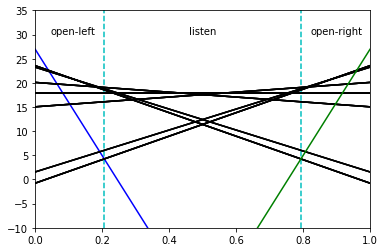

In [47]:
plot_utility(utility)

Hence, we get a piecewise-continuous utility function consistent with the given POMDP.

## POMDP for Preventative Maintenance
### Four state POMDP
Let's consider a problem where we have a machine with four levels of health. We don't observe the health levels, but instead
some measurement that helps us guess the underlying state of our system.
<br>
We will call our four states `0`,`1`,`2`,`3` where `0` denotes failing health and `3` denotes perfect health.
<br>
The possible actions we can take are as follows:
<br>
0. __NoRepair__: Don't intervene.
Represented by `0`.
1. __Repair__: Intervene.
Represented by `1`.

<br>
The possible observations we can get are as follows:
<br>

0. __VeryLow__: System appears to be in very low or failing health.

1. __Low__: Low health.

2. __High__: High health.

3. __VeryHigh__: System appears to be in very high or perfect health.

<br>
The reward function is as follows:
<br>
We get +10 reward for repairing the system when it's in low or very low health and we get -100 reward for repairing the system when it's healthy.
<br>
Not repairing an unhealthy system has a -1 reward.
<br>
We want to minimize our chances of system failure.


Our transition probabilities can be defined as:
<br>
<br>
Action `0` (Do Not Repair)
$\\
    P(0) = 
    \left[ {\begin{array}{cc}
    p_{00} & 0 & 0 & 0 \\
    p_{10} & p_{11} & 0 & 0 \\
    0 & p_{21} & p_{22} & 0 \\
    0 & 0 & p_{32} & p_{33} \\
    \end{array}}\right] \\
    \\
    $
    
Action `1` (Repair)
$\\
    P(1) = 
    \left[ {\begin{array}{cc}
    0 & p'_{01} & p'_{02} & p'_{03} \\
    0 & 0 & p'_{12} & p'_{13} \\
    0 & 0 & 0 & p'_{23} \\
    0 & 0 & 0 & p'_{33} \\
    \end{array}}\right] \\
    \\
    $
    
<br>
<br>
Our observation probabilities can be defined as the below where the top row represents measurement buckets and the left column represents health levels.:
<br>
<br>
$\\
    O(0) = 
    \left[ {\begin{array}{ccc}
    No Repair & 0 & 1 & 2 & 3 \\
    0 & o_{00} & o_{01} & o_{02} & o_{03} \\
    1 & o_{10} & o_{11} & o_{12} & o_{13} \\
    2 & o_{20} & o_{21} & o_{22} & o_{23} \\
    3 & o_{30} & o_{31} & o_{32} & o_{33} \\
    \end{array}}\right] \\
    \\
    $

$\\
    O(1) = 
    \left[ {\begin{array}{ccc}
    Repair & 0 & 1 & 2 & 3 \\
    0 & o'_{00} & o'_{01} & o'_{02} & o'_{03} \\
    1 & o'_{10} & o'_{11} & o'_{12} & o'_{13} \\
    2 & o'_{20} & o'_{21} & o'_{22} & o'_{23} \\
    3 & o'_{30} & o'_{31} & o'_{32} & o'_{33} \\
    \end{array}}\right] \\
    \\
    $<br>
<br>
The rewards of this POMDP are defined as:
<br>
<br>
$\\
    R(0) = 
    \left[ {\begin{array}{cc}
    No Repair & Reward \\
    1 & r_1 \\
    2 & r_2 \\
    3 & r_3 \\
    4 & r_4 \\
    \end{array}}\right] \\
    \\
    $
    
$\\
    R(1) = 
    \left[ {\begin{array}{cc}
    Repair & Reward \\
    1 & r'_1 \\
    2 & r'_2 \\
    3 & r'_3 \\
    4 & r'_4 \\
    \end{array}}\right] \\
    \\
    $    
    
<br>
We can define this reward function as $R(a)=c(4-s) + \sum_{s=1}^4 I(a=1|s)$ where $R_s(0)=r_s$ and $R_s(1)=r'_s$.
Based on these matrices, we will initialize our variables.

Let's first define our transition state.

In [12]:
t_prob = [[[1, 0, 0, 0], 
           [0.5, 0.5, 0, 0],
           [0.33, 0.34, .33, 0],
           [0.25, 0.25, .25, .25]], 
          
          [[0, .34, .33, .33], 
           [0, 0, .5, .5],
           [0, 0, 0, 1],
           [0, 0, 0, 1]]]

Followed by the observation model.

In [13]:
e_prob = [[[1, 0, 0, 0], 
           [0.5, 0.5, 0, 0],
           [0.33, 0.34, .33, 0],
           [0.25, 0.25, .25, .25]], 
          
          [[0, .34, .33, .33], 
           [0, 0, .5, .5],
           [0, 0, 0, 1],
           [0, 0, 0, 1]]]

And the reward model.

In [14]:
rewards = [[-100, 10, 0, 0], 
           [10, -100, 0, 0]]

Let's now define our states, observations and actions.
<br>
We will use `gamma` = 0.95 for this example.
<br>

In [20]:
# 0: no-repair, 1: repair
actions = ('0', '1')
# 0: failing, 1: low health, 2: good health, 3: perfect health
states = ('0', '1', '2', '3')

gamma = 0.95

We have all the required variables to instantiate an object of the `POMDP` class.

In [21]:
pomdp = POMDP(actions, t_prob, e_prob, rewards, states, gamma)

We can now find the utility function by running `pomdp_value_iteration` on our `pomdp` object.

In [22]:
utility = pomdp_value_iteration(pomdp, epsilon=3)
utility

defaultdict(list,
            {'1': [array([   3.66605674, -107.45733374,   -6.80408218,   -6.80408218])],
             '0': [array([-94.74629528, -12.8885413 , -15.61674513, -11.44427065])]})

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_utility(utility):
    open_left = utility['0'][0]
    open_right = utility['1'][0]
    listen_left = utility['2'][0]
    listen_right = utility['2'][-1]
    left = (open_left[0] - listen_left[0]) / (open_left[0] - listen_left[0] + listen_left[1] - open_left[1])
    right = (open_right[0] - listen_right[0]) / (open_right[0] - listen_right[0] + listen_right[1] - open_right[1])
    
    colors = ['g', 'b', 'k']
    for action in utility:
        for value in utility[action]:
            plt.plot(value, color=colors[int(action)])
    plt.vlines([left, right], -10, 35, linestyles='dashed', colors='c')
    plt.ylim(-10, 35)
    plt.xlim(0, 1)
    plt.text(left/2 - 0.35, 30, 'open-left')
    plt.text((right + left)/2 - 0.04, 30, 'listen')
    plt.text((right + 1)/2 + 0.22, 30, 'open-right')
    plt.show()

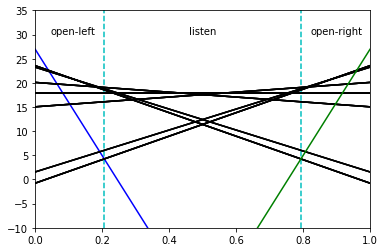

In [47]:
plot_utility(utility)

Hence, we get a piecewise-continuous utility function consistent with the given POMDP.